#random sample imputation
aim: it consists of taking random observation from the dataset and we use this observation to replace the nan values
when it should be used???
It assumes taht the data are missing completely at random(mcar)

In [4]:
import pandas as pd
df=pd.read_csv('C:\\Users\\adarsh\\Untitled Folder\\titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [5]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [6]:
df["age"].isnull().sum()

174

In [7]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [8]:
#creating random values for age          #replacing nan values with some sampled values
df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0) 
#we used drop na beacuse we dont want to take sample from nan values...

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [9]:
df[df['age'].isnull()].index

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
     #it will have random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 
    #pandas need to have same index in order to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
median = df.age.median()

In [12]:
median

28.0

In [13]:
impute_nan(df,'age',median)

In [14]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

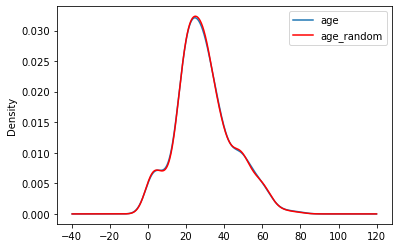

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_random.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [17]:
#hence two of the visualization we can see that a lot of variance diff in case of age_meadian as compare to age_random

###advantages 
1.easy to  implement
2.there is less distortion in variance .

####disadvantages
1. in every situation randomness wont work

